In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dropout
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.layers import Input, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

import warnings
warnings.filterwarnings("ignore")

In [123]:
df = pd.read_csv('ASAP Dataset/Preprocessed_df.csv')

In [124]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,word_len,chars_len,avg_word_length,avg_sentence_length,pos_ratios,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,386,1875,3.984456,1.0,"{'NNP': 0.031088082901554404, 'JJ': 0.05181347...",16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,464,2288,4.030172,1.0,"{'NNP': 0.03879310344827586, ',': 0.0258620689...",20,1,0.274000,0.613167,dear believe using computer benefit u many way...
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,313,1541,4.035144,1.0,"{'NNP': 0.04153354632587859, ',': 0.0287539936...",14,1,0.340393,0.498657,dear people use computer everyone agrees benef...
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,611,3165,4.328969,1.0,"{'NNP': 0.11620294599018004, ',': 0.0212765957...",27,1,0.266828,0.441795,dear local newspaper found many expert say com...
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,517,2569,4.071567,1.0,"{'NNP': 0.017408123791102514, ',': 0.025145067...",30,1,0.199684,0.485814,dear know computer positive effect people comp...


In [125]:
df = df.dropna(axis = 1, how = 'any')

In [126]:
drop_columns = ['essay_id', 'pos_ratios', 'essay']
df.drop(drop_columns, axis = 1, inplace = True)

In [127]:
def calc_precision(y_true, y_pred, average='macro'):
    """
    Calculates the precision score between the true and predicted values
    """
    precision = precision_score(y_true, y_pred, average=average)
    return precision

def calc_recall(y_true, y_pred, average='macro'):
    """
    Calculates the recall score between the true and predicted values
    """
    recall = recall_score(y_true, y_pred, average=average)
    return recall

def calc_f1_score(y_true, y_pred, average='macro'):
    """
    Calculates the f1-score between the true and predicted values
    """
    f1 = f1_score(y_true, y_pred, average=average)
    return f1

def calc_cohen_kappa_score(y_true, y_pred):
    """
    Calculates the cohen kappa score between the true and predicted values
    """
    kappa_score = cohen_kappa_score(y_true, y_pred, weights = 'quadratic')
    return kappa_score

def calc_accuracy(y_true, y_pred):
    """
    Calculates the accuracy score between the true and predicted values
    """
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

In [128]:
def print_metrics_function(y_actual, y_predictions):
    
    # Calculate and print accuracy
    accuracy = calc_accuracy(y_actual, y_predictions)
    print("Accuracy:", accuracy)
    
    # Calculate and print precision
    precision = calc_precision(y_actual, y_predictions)
    print("Precision:", precision)

    # Calculate and print recall
    recall = calc_recall(y_actual, y_predictions)
    print("Recall:", recall)

    # Calculate and print f1-score
    f1 = calc_f1_score(y_actual, y_predictions)
    print("F1-Score:", f1)

    # Calculate and print Cohen Kappa Score
    kappa_score = calc_cohen_kappa_score(y_actual, y_predictions)
    print("Cohen Kappa Score:", kappa_score)

    return accuracy, precision, recall, f1, kappa_score

In [129]:
df_essay_set1 = df[df.essay_set == 1]
df_essay_set2 = df[df.essay_set == 2]
df_essay_set3 = df[df.essay_set == 3]
df_essay_set4 = df[df.essay_set == 4]
df_essay_set5 = df[df.essay_set == 5]
df_essay_set6 = df[df.essay_set == 6]
df_essay_set7 = df[df.essay_set == 7]
df_essay_set8 = df[df.essay_set == 8]

In [130]:
def dataset_preparation(data, target = 'domain1_score'):
    
    X = data.drop([target], axis = 1)
    y = data[target]
    
    return X, y

In [131]:
X_set1, y_set1 = dataset_preparation(df_essay_set1)
X_set2, y_set2 = dataset_preparation(df_essay_set2)
X_set3, y_set3 = dataset_preparation(df_essay_set3)
X_set4, y_set4 = dataset_preparation(df_essay_set4)
X_set5, y_set5 = dataset_preparation(df_essay_set5)
X_set6, y_set6 = dataset_preparation(df_essay_set6)
X_set7, y_set7 = dataset_preparation(df_essay_set7)
X_set8, y_set8 = dataset_preparation(df_essay_set8)

In [132]:
X_train_set1, X_test_set1, y_train_set1, y_test_set1 = train_test_split(X_set1, y_set1, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set2, X_test_set2, y_train_set2, y_test_set2 = train_test_split(X_set2, y_set2, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set3, X_test_set3, y_train_set3, y_test_set3 = train_test_split(X_set3, y_set3, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set4, X_test_set4, y_train_set4, y_test_set4 = train_test_split(X_set4, y_set4, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set5, X_test_set5, y_train_set5, y_test_set5 = train_test_split(X_set5, y_set5, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set6, X_test_set6, y_train_set6, y_test_set6 = train_test_split(X_set6, y_set6, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set7, X_test_set7, y_train_set7, y_test_set7 = train_test_split(X_set7, y_set7, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set8, X_test_set8, y_train_set8, y_test_set8 = train_test_split(X_set8, y_set8, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

In [133]:
def print_shapes(X_train, X_test, y_train, y_test, 
                 set_value = "Essay Set-1"):
    
    print(f"------------------------{set_value}------------------------")
    print("The shape of input train data: {}".format(X_train.shape))
    print("The shape of input test data: {}".format(X_test.shape))
    print("The shape of output train data: {}".format(y_train.shape))
    print("The shape of output test data: {}".format(y_test.shape))
    print("\n")

In [134]:
print_shapes(X_train_set1, X_test_set1, y_train_set1, y_test_set1)
print_shapes(X_train_set2, X_test_set2, y_train_set2, y_test_set2, set_value = "Essay Set-2")
print_shapes(X_train_set3, X_test_set3, y_train_set3, y_test_set3, set_value = "Essay Set-3")
print_shapes(X_train_set4, X_test_set4, y_train_set4, y_test_set4, set_value = "Essay Set-4")
print_shapes(X_train_set5, X_test_set5, y_train_set5, y_test_set5, set_value = "Essay Set-5")
print_shapes(X_train_set6, X_test_set6, y_train_set6, y_test_set6, set_value = "Essay Set-6")
print_shapes(X_train_set7, X_test_set7, y_train_set7, y_test_set7, set_value = "Essay Set-7")
print_shapes(X_train_set8, X_test_set8, y_train_set8, y_test_set8, set_value = "Essay Set-8")

------------------------Essay Set-1------------------------
The shape of input train data: (1426, 12)
The shape of input test data: (357, 12)
The shape of output train data: (1426,)
The shape of output test data: (357,)


------------------------Essay Set-2------------------------
The shape of input train data: (1440, 12)
The shape of input test data: (360, 12)
The shape of output train data: (1440,)
The shape of output test data: (360,)


------------------------Essay Set-3------------------------
The shape of input train data: (1380, 12)
The shape of input test data: (346, 12)
The shape of output train data: (1380,)
The shape of output test data: (346,)


------------------------Essay Set-4------------------------
The shape of input train data: (1416, 12)
The shape of input test data: (354, 12)
The shape of output train data: (1416,)
The shape of output test data: (354,)


------------------------Essay Set-5------------------------
The shape of input train data: (1444, 12)
The shape 

### Bag-of-Words Representation + Scaling

In [135]:
def feature_engineering(train_data, test_data, column = 'preprocessed_text'):
    
    X_train_corpus = train_data[column]
    X_test_corpus = test_data[column]
    vectorizer = CountVectorizer()
    X_train_bow = vectorizer.fit_transform(X_train_corpus)
    X_test_bow = vectorizer.transform(X_test_corpus)
    X_train_bow = pd.DataFrame(X_train_bow.toarray(), columns = vectorizer.get_feature_names())
    X_test_bow = pd.DataFrame(X_test_bow.toarray(), columns = vectorizer.get_feature_names())
    X_train_features = train_data.drop([column], axis = 1)
    X_test_features = test_data.drop([column], axis = 1)
    X_train_features.reset_index(drop = True, inplace = True)
    X_test_features.reset_index(drop = True, inplace = True)
    X_train_final = pd.concat([X_train_bow, X_train_features], axis = 1)
    X_test_final = pd.concat([X_test_bow, X_test_features], axis = 1)
    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train_final)
    X_test_final = scaler.transform(X_test_final)
    
    return X_train_final, X_test_final

In [136]:
X_train_final, X_test_final = feature_engineering(X_train_set1, X_test_set1)

In [137]:
df.head()

,essay_set,rater1_domain1,rater2_domain1,domain1_score,word_len,chars_len,avg_word_length,avg_sentence_length,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,4,4,8,386,1875,3.984456,1.0,16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,1,5,4,9,464,2288,4.030172,1.0,20,1,0.274000,0.613167,dear believe using computer benefit u many way...
2,1,4,3,7,313,1541,4.035144,1.0,14,1,0.340393,0.498657,dear people use computer everyone agrees benef...
3,1,5,5,10,611,3165,4.328969,1.0,27,1,0.266828,0.441795,dear local newspaper found many expert say com...
4,1,4,4,8,517,2569,4.071567,1.0,30,1,0.199684,0.485814,dear know computer positive effect people comp...


In [179]:
df.columns

Index(['essay_set', 'rater1_domain1', 'rater2_domain1', 'domain1_score',
       'word_len', 'chars_len', 'avg_word_length', 'avg_sentence_length',
       'num_sentences', 'num_paragraphs', 'sentiment_polariy',
       'sentiment_subjectivity', 'preprocessed_text'],
      dtype='object')

In [138]:
X_train_set1['preprocessed_text']

1346    dear local people using computer year good hea...
1349    dear newspaper believe computer positive affec...
7       people agree computer make life le complicated...
1251    dear world changed much better technology beco...
661     technology growing changing rapidly look apple...
                              ...                        
599     dear know becoming reaching computer helpful m...
1599    although many people love computer palying vid...
1361    dear local newspaper think computer bad effect...
1547    dear local newspaper agree expert said compute...
863     dear local newspaper opinion computer everythi...
Name: preprocessed_text, Length: 1426, dtype: object

In [139]:
def quadratic_kappa(y_true, y_pred):
    """
    Calculate the quadratic Cohen's kappa score for two arrays of labels
    """
    # Convert predicted probabilities to integer labels
    y_pred_labels = tf.math.argmax(y_pred, axis=1)
    y_true_labels = tf.math.argmax(y_true, axis=1)
    
    # Calculate the quadratic kappa score
    kappa = cohen_kappa_score(y_true_labels, y_pred_labels, weights='quadratic')
    
    return kappa

### CNN Configuration - 1 Model (Essay Set-1)

In [140]:
features_train

,num_sentences,num_paragraphs
1346,37,1
1349,15,1
7,39,1
1251,31,1
661,26,1
...,...,...
599,10,1
1599,18,1
1361,18,1
1547,12,1


In [141]:
y_train_set1.nunique()

11

In [149]:
to_categorical(y_train_set1).shape[1]

13

In [153]:
padded_sequences_train.shape

(1426, 500)

In [154]:
y_train_set1_categorical.shape

(1426, 13)

In [159]:
len(tokenizer.word_index) + 1

12788

In [165]:
padded_sequences_train.shape

(1426, 500)

In [166]:
padded_sequences_test.shape

(357, 500)

In [167]:
y_train_set1_categorical.shape

(1426, 13)

In [178]:
import tensorflow as tf
from sklearn.metrics import cohen_kappa_score

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_set1['preprocessed_text'])
sequences_train = tokenizer.texts_to_sequences(X_train_set1['preprocessed_text'])
sequences_test = tokenizer.texts_to_sequences(X_test_set1['preprocessed_text'])

# Pad the sequences to a fixed length
max_length = 500
padded_sequences_train = pad_sequences(sequences_train, maxlen=max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen=max_length)

y_train_set1_categorical = to_categorical(y_train_set1)
y_test_set1_categorical = to_categorical(y_test_set1)

# Define the model architecture
text_input = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length)(text_input)
conv_layer = Conv1D(filters=10, kernel_size=2, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
dropout_layer = Dropout(0.2)(pooling_layer)
dense_layer1 = Dense(units=16, activation='relu')(dropout_layer)
output_layer = Dense(units=y_train_set1_categorical.shape[1], activation='softmax')(dense_layer1)
model = Model(inputs = text_input, outputs = output_layer)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(padded_sequences_train, y_train_set1_categorical, epochs=10, batch_size=32, validation_data=(padded_sequences_test, y_test_set1_categorical))


Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_42 (Embedding)     (None, 500, 100)          1278900   
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 499, 10)           2010      
_________________________________________________________________
global_max_pooling1d_29 (Glo (None, 10)                0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_63 (Dense)             (None, 13)              

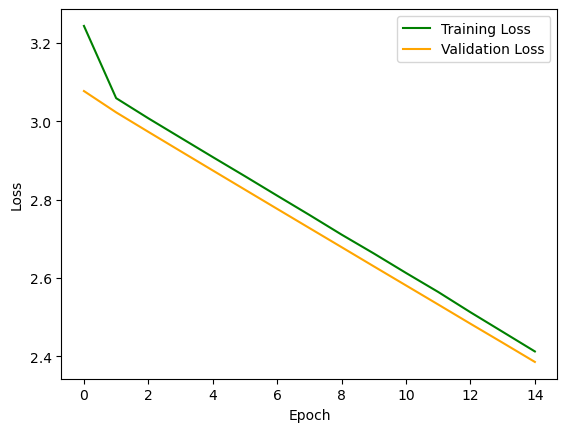

In [143]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss curves with scatter points
plt.plot(train_loss, color='green', label='Training Loss')
plt.plot(val_loss, color='orange', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### CNN Configuration - 2 Model (Cohesion)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_cohesion)
labels_test = np.array(y_test_cohesion)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 3 Model (Cohesion)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_cohesion)
labels_test = np.array(y_test_cohesion)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 4 Model (Cohesion)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_cohesion)
labels_test = np.array(y_test_cohesion)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 5 Model (Cohesion)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_cohesion)
labels_test = np.array(y_test_cohesion)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 6 Model (Cohesion)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_cohesion)
labels_test = np.array(y_test_cohesion)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 1 Model (Syntax)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_syntax)
labels_test = np.array(y_test_syntax)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 2 Model (Syntax)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_syntax)
labels_test = np.array(y_test_syntax)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 3 Model (Syntax)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_syntax)
labels_test = np.array(y_test_syntax)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 4 Model (Syntax)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_syntax)
labels_test = np.array(y_test_syntax)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 5 Model (Syntax)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_syntax)
labels_test = np.array(y_test_syntax)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 6 Model (Syntax)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_syntax)
labels_test = np.array(y_test_syntax)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 1 Model (Vocabulary)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_vocabulary)
labels_test = np.array(y_test_vocabulary)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 2 Model (Vocabulary)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_vocabulary)
labels_test = np.array(y_test_vocabulary)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 3 Model (Vocabulary)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_vocabulary)
labels_test = np.array(y_test_vocabulary)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 4 Model (Vocabulary)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_vocabulary)
labels_test = np.array(y_test_vocabulary)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 5 Model (Vocabulary)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_vocabulary)
labels_test = np.array(y_test_vocabulary)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 6 Model (Vocabulary)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_vocabulary)
labels_test = np.array(y_test_vocabulary)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 1 Model (Phraseology)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_phraseology)
labels_test = np.array(y_test_phraseology)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 2 Model (Phraseology)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_phraseology)
labels_test = np.array(y_test_phraseology)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 3 Model (Phraseology)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_phraseology)
labels_test = np.array(y_test_phraseology)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 4 Model (Phraseology)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_phraseology)
labels_test = np.array(y_test_phraseology)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 5 Model (Phraseology)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_phraseology)
labels_test = np.array(y_test_phraseology)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 6 Model (Phraseology)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_phraseology)
labels_test = np.array(y_test_phraseology)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 1 Model (Grammar)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_grammar)
labels_test = np.array(y_test_grammar)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 2 Model (Grammar)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_grammar)
labels_test = np.array(y_test_grammar)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 3 Model (Grammar)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_grammar)
labels_test = np.array(y_test_grammar)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 4 Model (Grammar)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_grammar)
labels_test = np.array(y_test_grammar)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 5 Model (Grammar)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_grammar)
labels_test = np.array(y_test_grammar)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 6 Model (Grammar)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_grammar)
labels_test = np.array(y_test_grammar)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 1 Model (Conventions)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_conventions)
labels_test = np.array(y_test_conventions)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 2 Model (Conventions)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_conventions)
labels_test = np.array(y_test_conventions)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 3 Model (Conventions)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_conventions)
labels_test = np.array(y_test_conventions)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 4 Model (Conventions)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_conventions)
labels_test = np.array(y_test_conventions)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 5 Model (Conventions)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_conventions)
labels_test = np.array(y_test_conventions)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))

### CNN Configuration - 6 Model (Conventions)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_length = len(max(sequences_train))
padded_sequences_train = pad_sequences(sequences_train, maxlen = max_length)
padded_sequences_test = pad_sequences(sequences_test, maxlen = max_length)

# Convert the labels to a NumPy array
labels_train = np.array(y_train_conventions)
labels_test = np.array(y_test_conventions)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=8, input_length=max_length))
model.add(Conv1D(filters=1, kernel_size=20, padding='same', activation='relu'))
model.add(Dropout(0.95))
model.add(MaxPooling1D(pool_size=20))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
optimizer = Adam(learning_rate = 0.0012)
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(padded_sequences_train, labels_train, epochs=15, batch_size=64,
                   validation_data = (padded_sequences_test, labels_test))